#Initial Value Problem Ordinary Differential Equations

This Course is part of ***Introduction to numerical analysis*** by HSE University **[[Coursera](https://www.coursera.org/learn/intro-to-numerical-analysis)]**

# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

Solucion tomada de "
valerkabvv"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

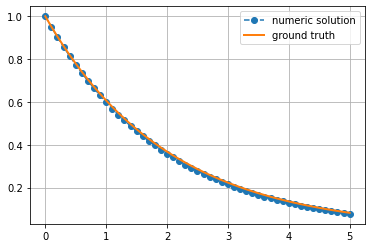

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
from sklearn.metrics import mean_absolute_error
tao = [3, 2, 1, 1e-1, 1e-2, 1e-3, 1e-4]
lam = -0.5
for dt in tao:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    print("tao -", dt, "MAE -", mean_absolute_error(np.exp(lam*tt), y))

tao - 3 MAE - 0.3615650800742149
tao - 2 MAE - 0.16773824146935168
tao - 1 MAE - 0.07436842381550283
tao - 0.1 MAE - 0.007159245952545797
tao - 0.01 MAE - 0.0007130252805831734
tao - 0.001 MAE - 7.127347876430624e-05
tao - 0.0001 MAE - 7.127057334425005e-06


### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [ ]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...
def implict_euler_scheme(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-dt*lam)
    return tt, y

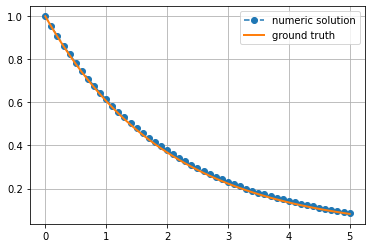

In [ ]:
lam = -0.5
tt, y = implict_euler_scheme(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [ ]:
# ... ENTER YOUR CODE HERE ...

def modified_euler_solve(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*A@y[k]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
A = np.array([[-10, 10], [32, -499]])
u = np.array([1,0]).T
tt, y = modified_euler_solve(A, u, 5, 1e-2)

print(np.linalg.eigvals(A))

[  -9.34647667 -499.65352333]


### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def mod_implict_euler_scheme(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve((np.eye(A.shape[0])-dt*A), y[k])
    return tt, y

In [ ]:
A = np.array([[-10, 10], [32, -499]])
u = np.array([1,0]).T
tt, y = mod_implict_euler_scheme(A, u, 5, 1e-2)

print(np.linalg.eigvals(A))

[  -9.34647667 -499.65352333]


# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def oscilation_solve(w, u0, T, dt):
    A = np.array([[0, 1], [-w**2, 0]])
    return modified_euler_solve(A, u0, T, dt)

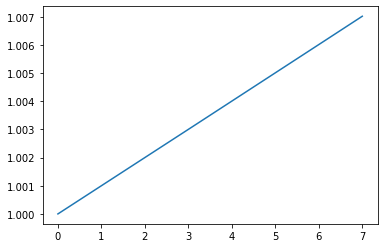

In [ ]:
E = lambda u, du, w: du**2/2 + w**2*u**2/2

tt,y = oscilation_solve(1, np.array([1,1]), 7, 1e-3)

tt_y = E(y[:,0], y[:, 1], 1)

plt.plot(tt, tt_y, label = "E");

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def RK(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        a1 = A@y[k]
        a2 = A@(y[k]+dt/2*a1)
        y[k+1] = dt*a2+y[k]
    return tt, y

In [ ]:
def osc_slv_RK(w, u0, T, dt):
    A = np.array([[0, 1], [-w**2, 0]])
    return RK(A, u0, T, dt)

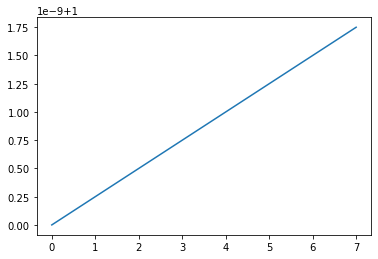

In [ ]:
tt,y = osc_slv_RK(1, np.array([1,1]), 7, 1e-3)

tt_y = E(y[:,0], y[:, 1], 1)

plt.plot(tt, tt_y, label = "E");